<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [258]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7fce46f7cb60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce46f7d0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fce46f7c680>],
 'medians': [<matplotlib.lines.Line2D at 0x7fce46f7d6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fce46f7d5b0>],
 'means': []}

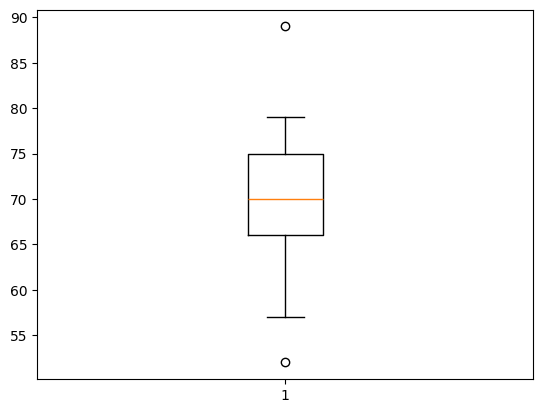

In [259]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






# 1.0 Análisis del data frame

### 1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [260]:
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")

### 2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [262]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [263]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [264]:
df = df.dropna()


### 3. Determinar los elementos únicos dentro de la columna ocean_proximity.

In [265]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [266]:
df["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

### 4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [267]:
cols = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

In [268]:
df.groupby("ocean_proximity")[cols].mean().round(2).rename(columns=lambda x: x + "_mean")


,housing_median_age_mean,total_rooms_mean,total_bedrooms_mean,population_mean,households_mean,median_income_mean,median_house_value_mean
ocean_proximity,,,,,,,
<1H OCEAN,29.28,2627.23,546.54,1518.44,517.42,4.23,240267.99
INLAND,24.26,2721.25,533.88,1392.41,478.01,3.21,124896.86
ISLAND,42.40,1574.60,420.40,668.00,276.60,2.74,380440.00
NEAR BAY,37.76,2490.34,514.18,1227.88,487.24,4.18,259279.29
NEAR OCEAN,29.31,2587.17,538.62,1355.64,501.53,4.01,249042.36


### 5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

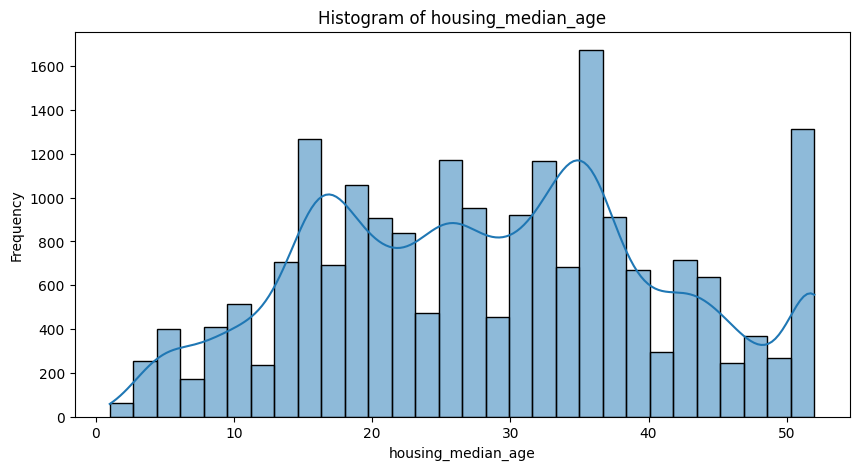

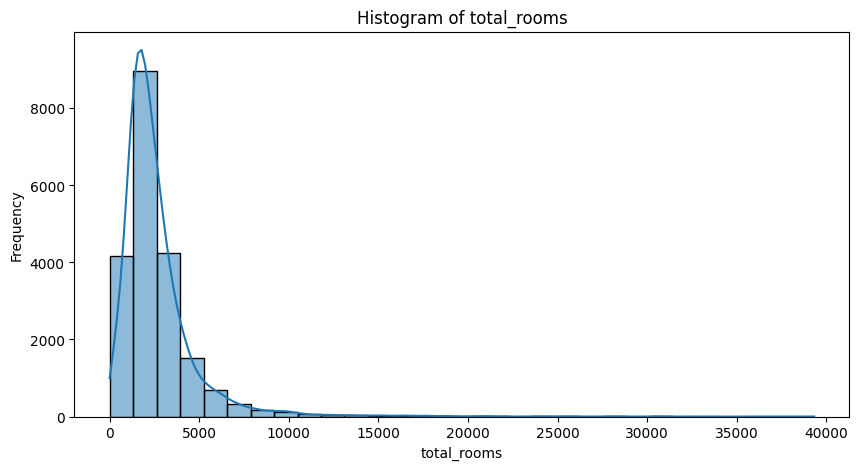

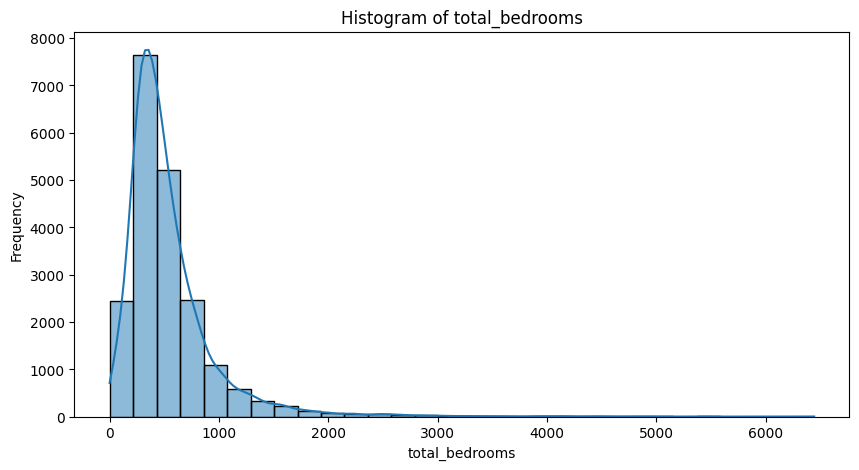

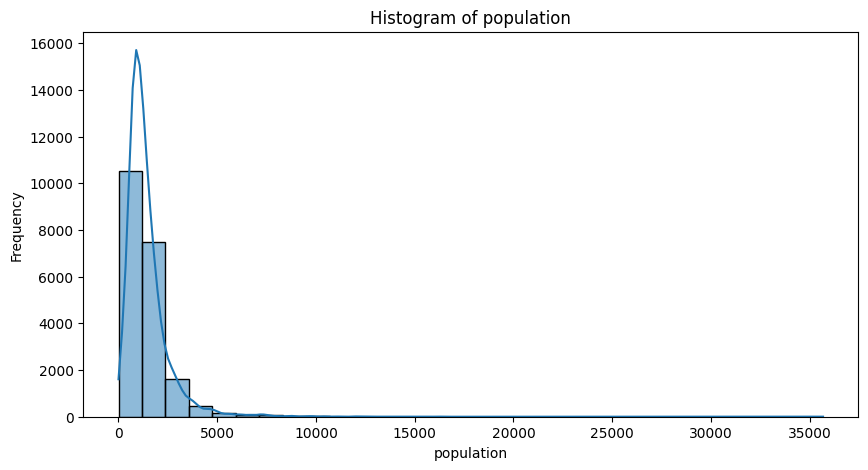

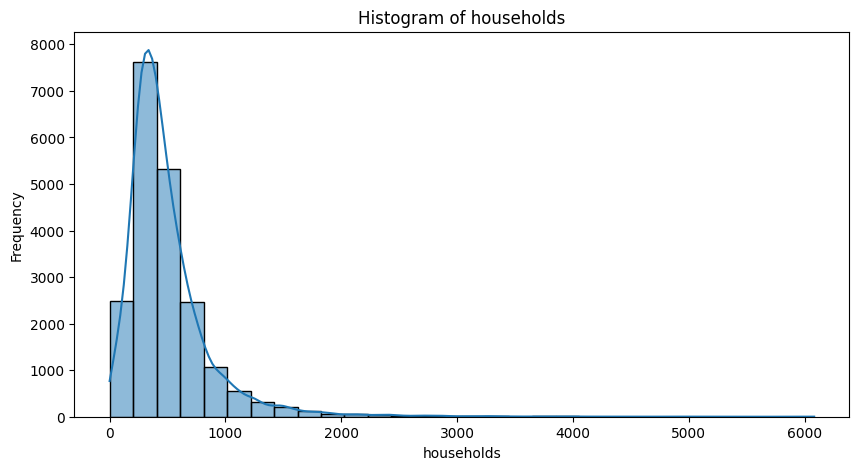

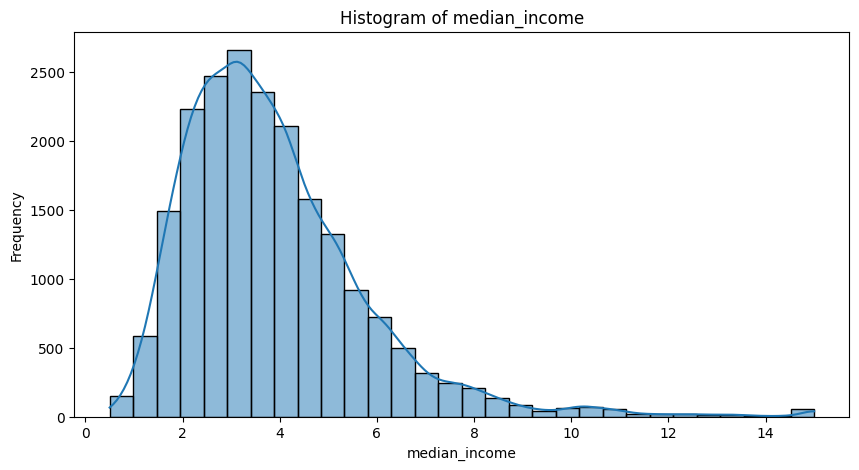

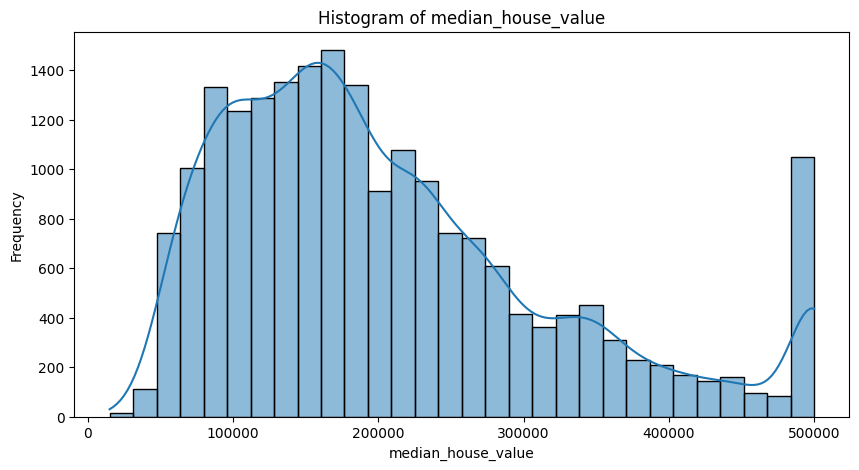

In [269]:
# Histogram for columns using seaborn

for col in cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

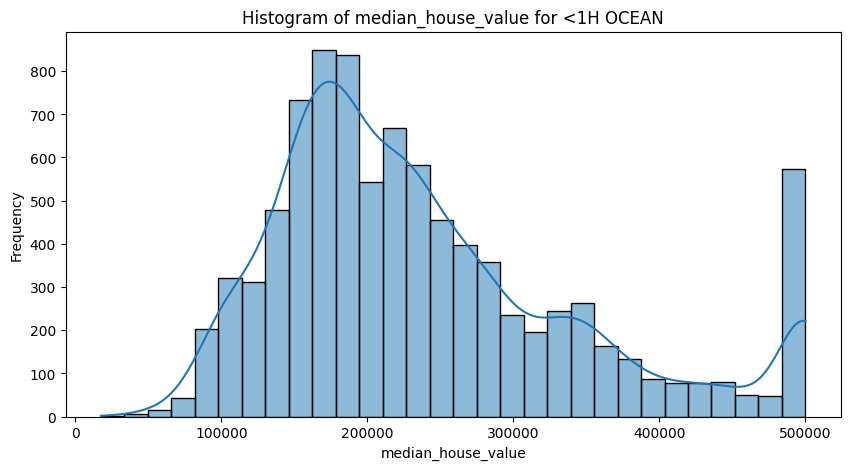

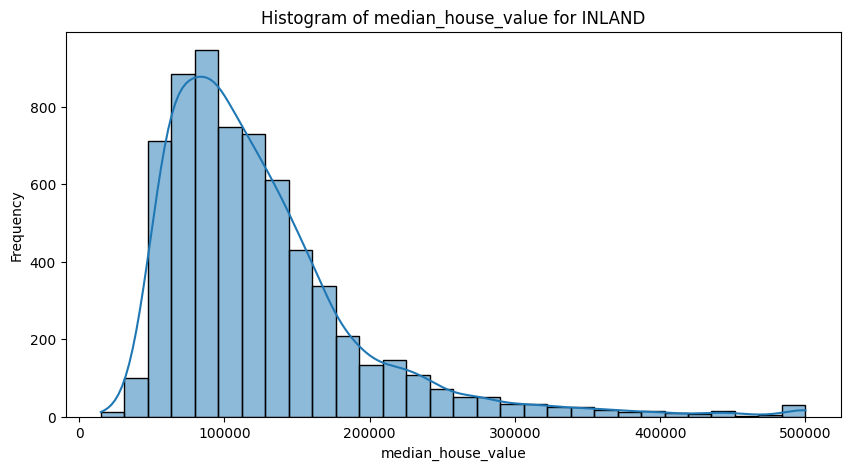

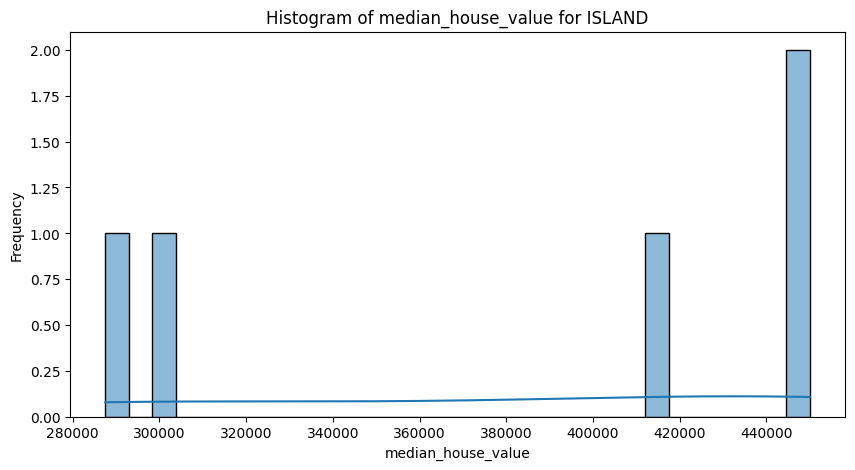

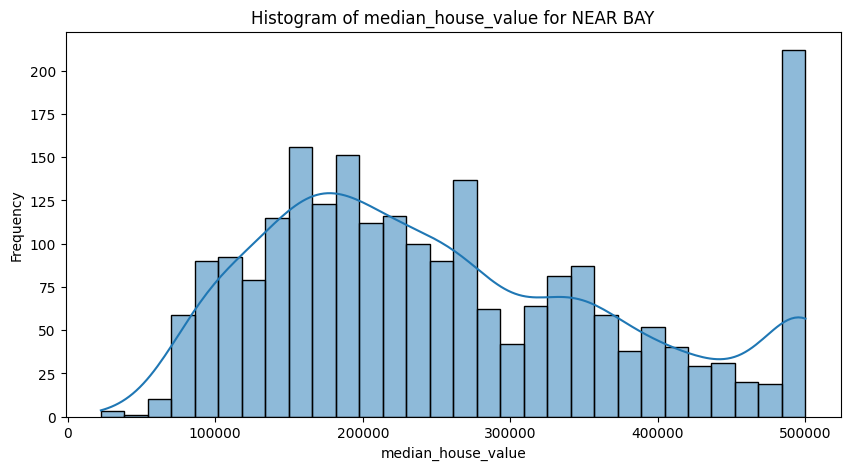

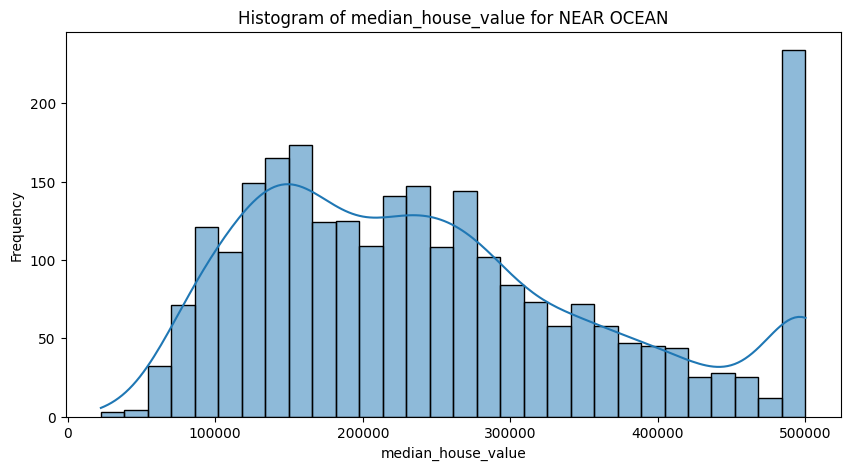

In [270]:
# Histogramas for columns grouped by ocean_proximity
groups = df.groupby("ocean_proximity")[cols]

for name, group in groups:
    plt.figure(figsize=(10, 5))
    sns.histplot(group["median_house_value"], kde=True, bins=30)
    plt.title(f"Histogram of median_house_value for {name}")
    plt.xlabel("median_house_value")
    plt.ylabel("Frequency")
    plt.show()

### 7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

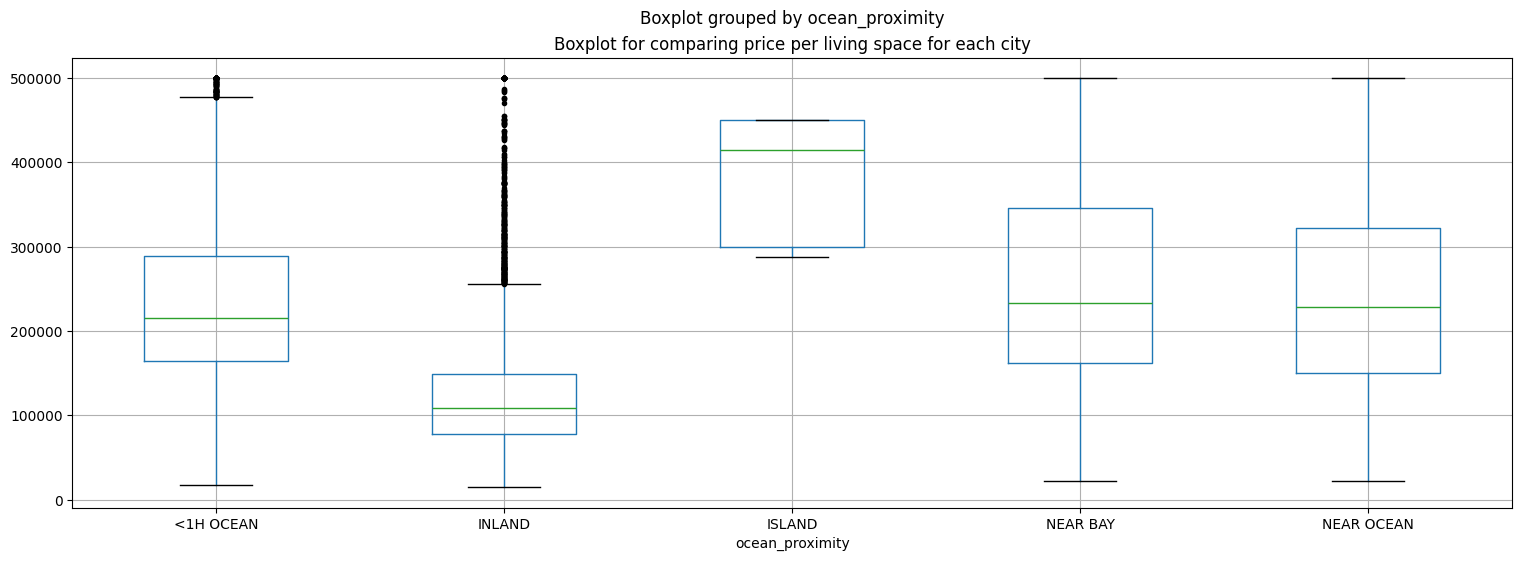

In [271]:
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [273]:
df["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<Axes: title={'center': 'median_house_value'}, xlabel='ocean_proximity'>

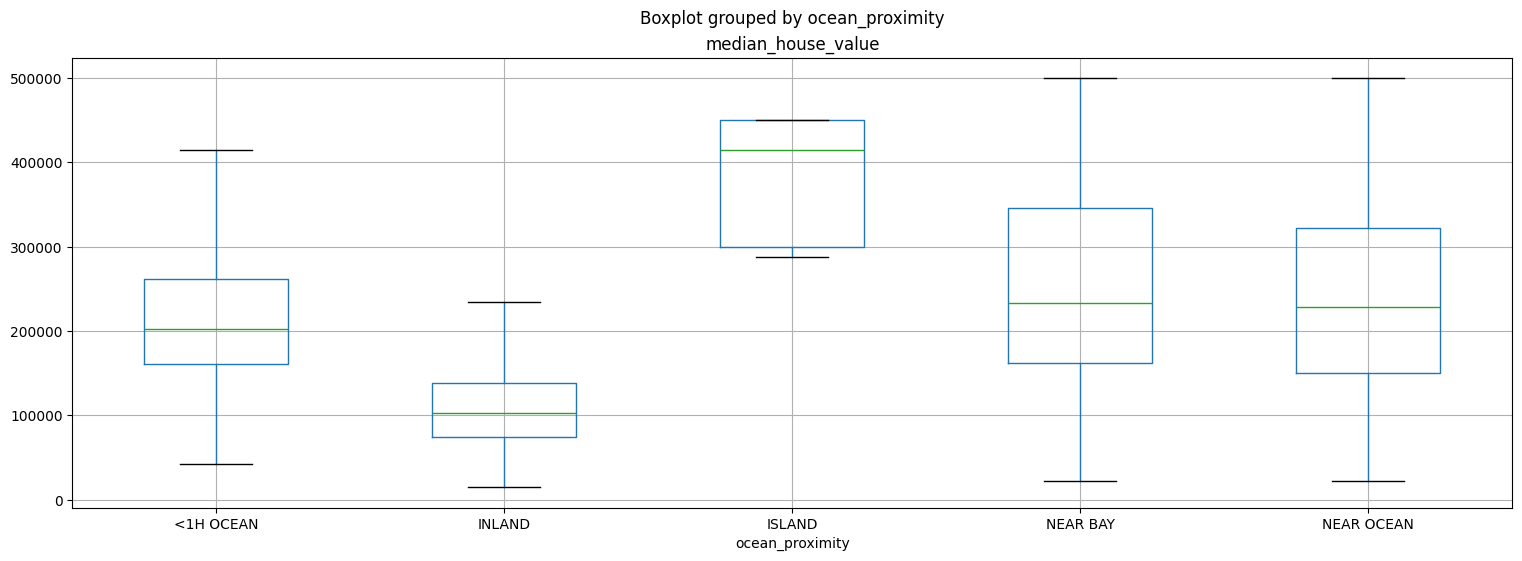

In [274]:
col = "median_house_value"

# 1. Identifica los dos primeros valores únicos de la columna de grupos
primero, segundo = ['<1H OCEAN', 'INLAND']

# 2. Asocia a cada uno su multiplicador de IQR
IQR_mult = {primero: 1, segundo: 1.2}

# 3. Recolecta índices de outliers
outliers_idx = []
for cat, m in IQR_mult.items():
    # Serie de valores para este grupo
    vals = df.loc[df["ocean_proximity"] == cat, col]
    Q1 = vals.quantile(0.25)
    Q3 = vals.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - m * IQR, Q3 + m * IQR

    # Máscara de outliers dentro de este grupo
    mask_out = (
        (df["ocean_proximity"] == cat) &
        ((df[col] < lower) | (df[col] > upper))
    )
    # Añade sus índices a la lista
    outliers_idx.extend(df.index[mask_out])

# 4. Elimina esas filas del df original (in-place)
df.drop(index=outliers_idx, inplace=True)

df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))



### 8. Determina la matrix de correlación.

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19130 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19130 non-null  float64
 1   latitude            19130 non-null  float64
 2   housing_median_age  19130 non-null  float64
 3   total_rooms         19130 non-null  float64
 4   total_bedrooms      19130 non-null  float64
 5   population          19130 non-null  float64
 6   households          19130 non-null  float64
 7   median_income       19130 non-null  float64
 8   median_house_value  19130 non-null  float64
 9   ocean_proximity     19130 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


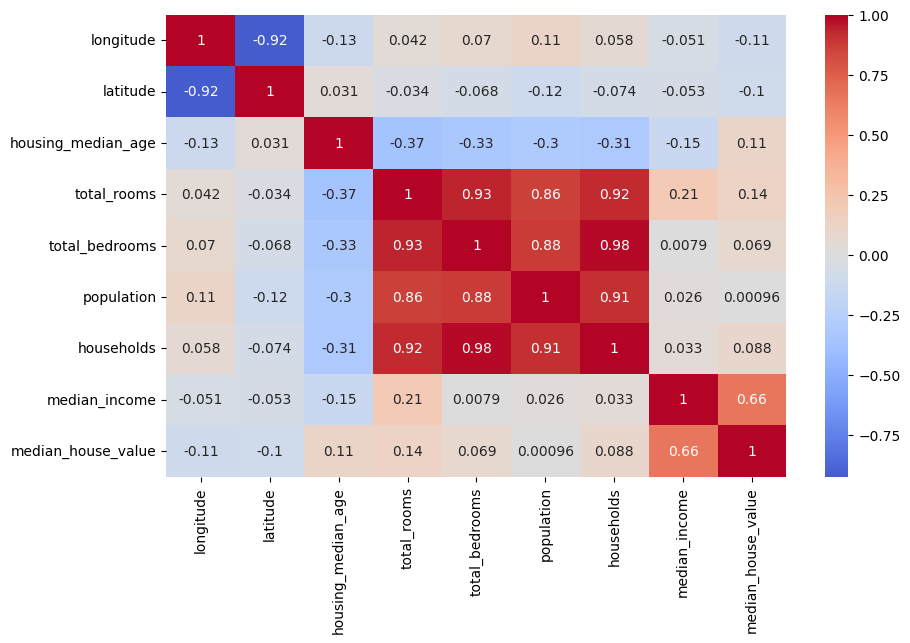

In [276]:
numeric_cols = df.select_dtypes(include="float64").columns.tolist()
corr_matrix = df[numeric_cols].corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

### 9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

In [277]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]


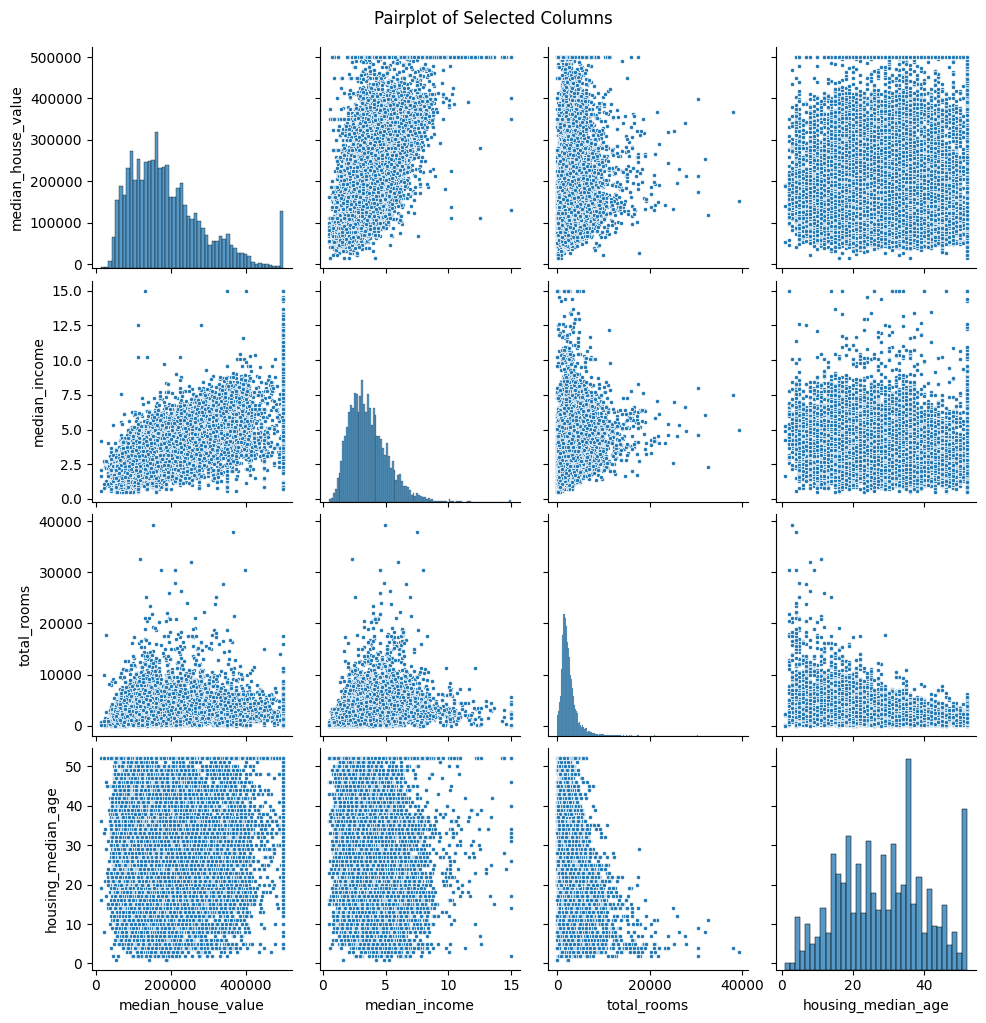

In [278]:
# Pairplot for selected columns using seaborn
sns.pairplot(df[cols], diag_kind="auto", markers=".")
plt.suptitle("Pairplot of Selected Columns", y=1.02)
plt.show()

### 10. Realizaun scatter plot con la libreria seaborn de python, el color del grafico puede ser empleado con la columna median_house_value

In [279]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

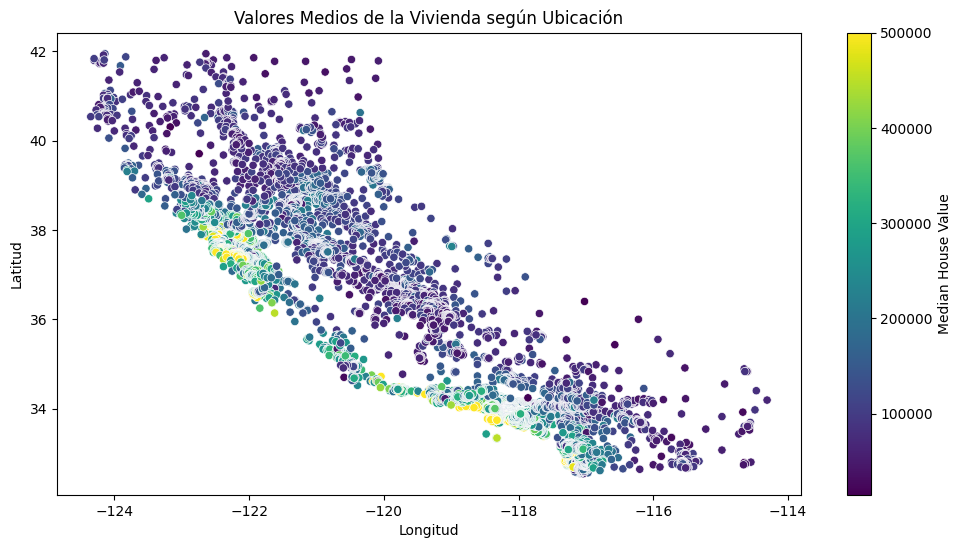

In [280]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='longitude', y='latitude',
    hue='median_house_value',
    palette='viridis',
    legend=False,
    ax=ax
)

norm = mpl.colors.Normalize(
    vmin=df['median_house_value'].min(),
    vmax=df['median_house_value'].max()
)
sm = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Median House Value')

ax.set_title('Valores Medios de la Vivienda según Ubicación')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()


# 2.0 Preparacion del data frame

### 11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [281]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

15304
3826


* El uso de 80% de los datos para training y 20% para test es un valor comun para entrenar y testear un modelo. Sin embargo, podria sub representar ciertas categorias. Por lo cual es mejor buscar una forma de identificar y representar esas categorias dependiendo de lo que se quiera analizar. Por ejemplo:

In [282]:
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["income_cat"]
)

### 12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

<Axes: >

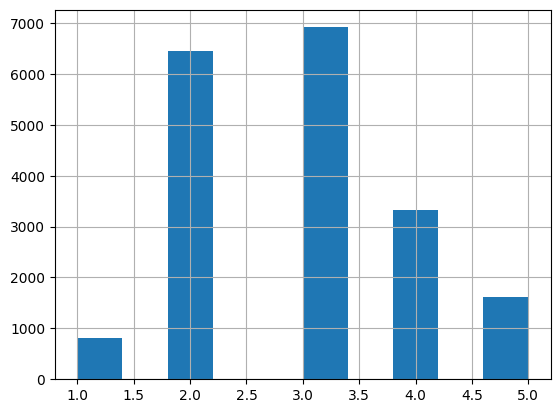

In [283]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [284]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

### Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

In [285]:
a = df["income_cat"].value_counts() / len(df)

b = strat_train_set["income_cat"].value_counts() / len(strat_train_set)

c = strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

d = train_set["income_cat"].value_counts() / len(train_set)
e = test_set["income_cat"].value_counts() / len(test_set)

In [286]:
pd.DataFrame({
    "Original": a,
    "Stratified Train": b,
    "Stratified Test": c,
    "Random Train": d,
    "Random Test": e
}).sort_index()
    

,Original,Stratified Train,Stratified Test,Random Train,Random Test
income_cat,,,,,
1,0.042081,0.042081,0.042081,0.042799,0.039205
2,0.337428,0.337428,0.337428,0.338474,0.333246
3,0.361579,0.361605,0.361474,0.359906,0.368270
4,0.173968,0.173941,0.174072,0.172635,0.179300
5,0.084945,0.084945,0.084945,0.086187,0.079979


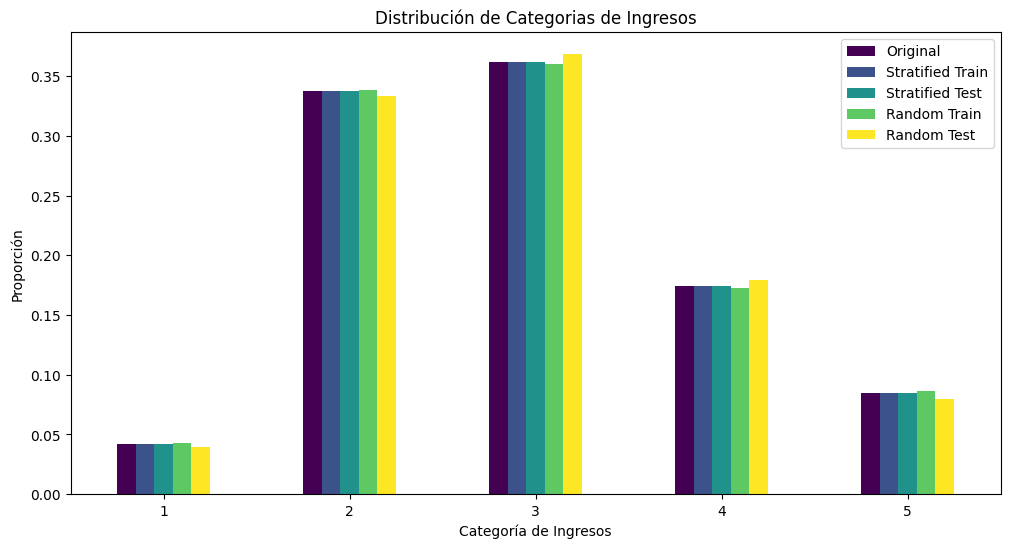

In [287]:
pd.DataFrame({
    "Original": a,
    "Stratified Train": b,
    "Stratified Test": c,
    "Random Train": d,
    "Random Test": e
}).sort_index().plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Distribución de Categorias de Ingresos")
plt.xlabel("Categoría de Ingresos")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

* En el grafico se observa claramente que el sampleo estratificado mantiene las proporciones originales casi identicas, mientras que el sampleo random las altera.
* En algunos casos, el sampleo aleatorio aumenta las proporciones y en otros las disminuye, lo que afecta negativamente el entrenamiento del modelo.

### 14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [288]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")
df_train = strat_train_set

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19609053e+02,  3.56812611e+01,  2.85846837e+01,  2.61531632e+03,
        5.41002679e+02,  1.44039140e+03,  5.02216414e+02,  3.68320665e+00,
        1.92562450e+05,  2.92224255e+00])

In [289]:
ser = pd.Series(imp_mean.statistics_, index=df_train_num.columns)
df_train_num["income_cat"] = df_train_num["income_cat"].astype(int)
train_median = df_train_num.median()

pd.DataFrame({
    "Imputer Mean": ser,
    "Median": train_median
})

,Imputer Mean,Median
longitude,-119.609053,-118.6200
latitude,35.681261,34.3200
housing_median_age,28.584684,29.0000
total_rooms,2615.316323,2115.0000
total_bedrooms,541.002679,439.0000
population,1440.391401,1180.0000
households,502.216414,413.5000
median_income,3.683207,3.4306
median_house_value,192562.449752,171400.0000
income_cat,2.922243,3.0000


In [290]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

### 15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```

In [291]:
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()


array(['<1H OCEAN', 'NEAR BAY', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

* Se obtienen los valores unicos de la columna "ocean_proximity"

In [292]:
housing_cat=df_train[["ocean_proximity"]]
housing_cat

,ocean_proximity
20132,<1H OCEAN
9935,NEAR BAY
15144,<1H OCEAN
19701,INLAND
19987,INLAND
...,...
9124,INLAND
7569,<1H OCEAN
8917,<1H OCEAN
18744,INLAND


* Se crea un dataframe solo con la columna ocean_proximity

In [293]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


* ```python cat_encoder.fit_transform(housing_cat)``` crea una matriz cuyas filas tienen la misma longitud del numero de valores unicos de la columan ocean_proximity, y tienen un uno en la posicion correspondiente a la poscion del valor unico de ocean_proximity y cero en el resto.

In [294]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])
df_cat_1hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
15299,0.0,1.0,0.0,0.0,0.0
15300,1.0,0.0,0.0,0.0,0.0
15301,1.0,0.0,0.0,0.0,0.0
15302,0.0,1.0,0.0,0.0,0.0


* Se crea un dataframe con los valores de ```python cat_encoder.fit_transform(housing_cat)``` y se nombran las columnas.

In [295]:
housing_tr_ = housing_tr.join(df_cat_1hot)
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.90,34.41,35.0,4431.0,739.0,2304.0,720.0,4.2599,209100.0,3.0,1.0,0.0,0.0,0.0,0.0
1,-122.30,38.27,4.0,1051.0,263.0,455.0,248.0,3.6389,130200.0,3.0,0.0,0.0,0.0,1.0,0.0
2,-116.91,32.82,14.0,1978.0,424.0,1085.0,387.0,3.8073,170100.0,3.0,1.0,0.0,0.0,0.0,0.0
3,-121.65,39.13,11.0,4833.0,944.0,2336.0,841.0,2.6842,89100.0,2.0,0.0,1.0,0.0,0.0,0.0
4,-119.32,36.20,25.0,1427.0,246.0,772.0,221.0,2.2262,64500.0,2.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,-118.08,34.58,5.0,1113.0,186.0,631.0,168.0,4.1719,146600.0,3.0,0.0,1.0,0.0,0.0,0.0
15300,-118.20,33.89,40.0,2538.0,564.0,2170.0,541.0,2.7212,107900.0,2.0,1.0,0.0,0.0,0.0,0.0
15301,-118.47,34.02,38.0,2163.0,651.0,1759.0,584.0,2.3382,297500.0,2.0,1.0,0.0,0.0,0.0,0.0
15302,-122.32,40.57,15.0,2524.0,449.0,1374.0,467.0,3.3816,93800.0,3.0,0.0,1.0,0.0,0.0,0.0


* Se le une al dataframe original le dataframe df_cat_1hot 

### 16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [296]:
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.90,34.41,35.0,4431.0,739.0,2304.0,720.0,4.2599,1.0,0.0,0.0,0.0,0.0
1,-122.30,38.27,4.0,1051.0,263.0,455.0,248.0,3.6389,0.0,0.0,0.0,1.0,0.0
2,-116.91,32.82,14.0,1978.0,424.0,1085.0,387.0,3.8073,1.0,0.0,0.0,0.0,0.0
3,-121.65,39.13,11.0,4833.0,944.0,2336.0,841.0,2.6842,0.0,1.0,0.0,0.0,0.0
4,-119.32,36.20,25.0,1427.0,246.0,772.0,221.0,2.2262,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,-118.08,34.58,5.0,1113.0,186.0,631.0,168.0,4.1719,0.0,1.0,0.0,0.0,0.0
15300,-118.20,33.89,40.0,2538.0,564.0,2170.0,541.0,2.7212,1.0,0.0,0.0,0.0,0.0
15301,-118.47,34.02,38.0,2163.0,651.0,1759.0,584.0,2.3382,1.0,0.0,0.0,0.0,0.0
15302,-122.32,40.57,15.0,2524.0,449.0,1374.0,467.0,3.3816,0.0,1.0,0.0,0.0,0.0


In [297]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.540541,0.198725,0.666667,0.112646,0.114525,0.064492,0.118237,0.259307,1.0,0.0,0.0,0.0,0.0
1,0.200200,0.608927,0.058824,0.026680,0.040658,0.012669,0.040618,0.216480,0.0,0.0,0.0,1.0,0.0
2,0.739740,0.029756,0.254902,0.050257,0.065642,0.030326,0.063476,0.228093,1.0,0.0,0.0,0.0,0.0
3,0.265265,0.700319,0.196078,0.122870,0.146338,0.065389,0.138135,0.150639,0.0,1.0,0.0,0.0,0.0
4,0.498498,0.388948,0.470588,0.036243,0.038020,0.021553,0.036178,0.119054,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,0.622623,0.216791,0.078431,0.028257,0.028709,0.017601,0.027463,0.253238,0.0,1.0,0.0,0.0,0.0
15300,0.610611,0.143464,0.764706,0.064500,0.087368,0.060736,0.088801,0.153191,1.0,0.0,0.0,0.0,0.0
15301,0.583584,0.157279,0.725490,0.054962,0.100869,0.049217,0.095872,0.126778,1.0,0.0,0.0,0.0,0.0
15302,0.198198,0.853348,0.274510,0.064144,0.069522,0.038426,0.076632,0.198735,0.0,1.0,0.0,0.0,0.0


### 17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

In [298]:
def prepare_housing_data(df):
    # Imputar valores faltantes
    df_num = df.drop("ocean_proximity", axis=1)
    imp_mean = SimpleImputer(strategy='mean')
    X = imp_mean.fit_transform(df_num)
    
    # Codificar variables categóricas
    housing_cat = df[["ocean_proximity"]]
    cat_encoder = OneHotEncoder(sparse_output=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    
    # Crear DataFrame con las variables codificadas
    df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_[0])
    
    # Unir DataFrames
    housing_tr_ = pd.DataFrame(X, columns=df_num.columns).join(df_cat_1hot)
    
    # Escalar características numéricas
    scaler = MinMaxScaler()
    housing_scale = housing_tr_.select_dtypes(include=[np.number])
    scaler.fit(housing_scale)
    
    X_scaled = scaler.transform(housing_scale)
    
    return pd.DataFrame(X_scaled, columns=housing_scale.columns)

In [299]:
# Preprarar el conjunto de entrenamiento y prueba con los datos preparados
#df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")

df_prepared = prepare_housing_data(df)
df_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,1.00,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,1.00,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,1.00,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.50,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.25,0.0,1.0,0.0,0.0,0.0
19126,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.25,0.0,1.0,0.0,0.0,0.0
19127,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.25,0.0,1.0,0.0,0.0,0.0
19128,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.25,0.0,1.0,0.0,0.0,0.0


In [300]:
y = df_prepared["median_house_value"].copy()

X = df_prepared.drop("median_house_value", axis=1)

In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [302]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [303]:
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

print(f"R^2 Test: {r2_test:.4f}")
print(f"RMSE Test: {rmse_test:.4f}")

R^2 Test: 0.6230
RMSE Test: 0.1270


In [306]:
# Métricas en entrenamiento
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Train:  {r2_train:.4f}")
print(f"RMSE Train: {rmse_train:.4f}")


R^2 Train:  0.6606
RMSE Train: 0.1213


### 18. ¿que puede concluir respecto al modelo empleado?

* El modelo predice correctamente el 62% de los datos de prueba. La diferencia entre $R^2_Test$ y $R^2_Train$ no es muy grande por lo que puede asegurarse que el modelo no esta haciendo overfiting.
* El modelo funciona aceptablemente para predecir el valor de las casas.

### 19. ¿El modelo de regresión lineal es valido para lo construido,

* Si, el modelo es aceptable para las condiciones propuestas.

### 20. ¿qué informacion nos da el score?

* El $R^2$ nos permite saber que porcentaje de los datos es capaz de explicar.

### 21. ¿Puede ser ajustado a otro modelo?

* Si, con los datos obtenidos despues de la limpieza y la clasificaciuon es posible aplicar otro modelo.

### 22. ¿Como puede autmatizar todo el proceso empleando pipelines?

* Puede crearse una clase que aplique todos los procesos realizados en cadena a un df general y que devuelva el modelo ya entrenado y los resultados obrenidos.